In [43]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler


In [44]:
%config InlineBackend.figure_formats = ['svg']

In [47]:
# plt.style.use('ggplot')

# file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
# models = {'Original': 'baseline', 'LMR-R': 'linear-Burke'}
# colours = ["xkcd:grey",'xkcd:purple']
Tin = 293  # unburned gas temperature [K]
p=760  # pressure [torr]
n=10 # number of points to simulate
phi_list = np.linspace(0.5,1.5,n) # equivalence ratios to simulate across
# for k, m in enumerate(models):
vel_list = []
P_e = []
gas = ct.Solution(file)
for j, phi in enumerate(phi_list):
    print("NNNNNNNNNNNNNNNNNNN  ", j)
    gas.set_equivalence_ratio(phi, 'C2H5OH', {'O2':1, 'N2': 3.76})
    # gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
    gas.TP = Tin, (p/760)*ct.one_atm
    print(gas())
    P_e.append(gas.concentrations[gas.species_index("c2h5oh")]*1000*8.31*gas.T/1e5)
    f = ct.FreeFlame(gas, grid=np.linspace(0, 0.05, 30))
    f.set_refine_criteria(ratio=3, slope=0.06, curve=0.10)
    # f.transport_model = 'multicomponent' # optionally enable
    # f.soret_enabled = True  # optionally enable
    f.solve(loglevel=1, auto=True)
    vel_list.append(f.velocity[0] * 100) # cm/s
    f.save(file.split("/")[-1] + f".{j}.res.hdf")


/tmp/ipykernel_1641619/430701594.py:14: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/430701594.py:14: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/430701594.py:14: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/430701594.py:14: UserWarning: NasaPoly2::validate: 
For spec

NNNNNNNNNNNNNNNNNNN   0

  gas:

       temperature   293 K
          pressure   1.0132e+05 Pa
           density   1.2242 kg/m^3
  mean mol. weight   29.433 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.7584e+05       -8.1188e+06  J
   internal energy        -3.586e+05       -1.0555e+07  J
           entropy              6869        2.0218e+05  J/K
    Gibbs function       -2.2884e+06       -6.7357e+07  J
 heat capacity c_p            1030.1             30319  J/K
 heat capacity c_v            747.61             22005  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2           0.72639           0.76319           -23.304
                O2           0.22066           0.20298           -26.269
            C2H5OH           0.05295          0.033

/tmp/ipykernel_1641619/4034545094.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc='upper right')


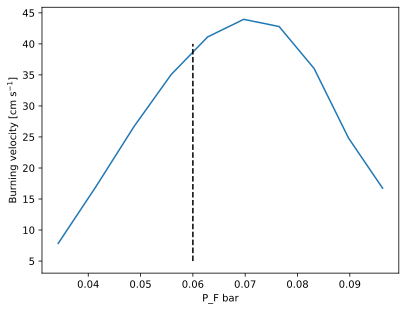

In [48]:

fig, ax = plt.subplots()
ax.plot(P_e, vel_list)
# ax.set_xticklabels([f"{phi:.1f} {p/(10**5):.3f}" for p, phi in zip(P_e, phi_list)])
# expData = {
#    'X_NH3': [16.3,16.4,17.0,18.0,19.0,20.0,21.9,24.0,26.0,28.5,29.0,30.0,31.0,31.5],
#    'vel': [1.35,1.48,2.30,3.36,4.01,5.88,6.80,8.14,6.73,5.00,4.78,3.3,2.9,3.0]
# }
# X_NH3 = np.divide(expData['X_NH3'],100)
# X_O2 = np.multiply(np.subtract(1,X_NH3), 0.21)
# phi_data = np.divide(np.divide(X_NH3,X_O2),np.divide(4,3))
# ax.plot(phi_data, expData['vel'], 'o', fillstyle='none', color='k', label='Ronney')
ax.legend(frameon=False, loc='upper right')
ax.set_ylabel(r'Burning velocity [cm $\rm s^{-1}$]')
ax.set_xlabel(r'P_F bar')
ax.plot([0.06, 0.06], [5, 40], '--', color='k')

In [21]:
# f.save(file.split("/")[-1] + ".res.hdf")

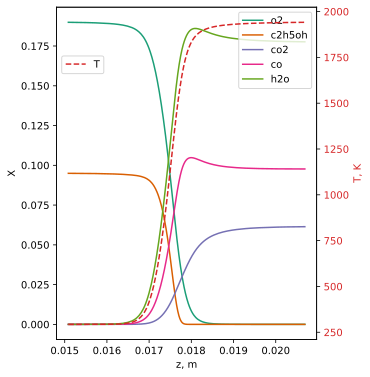

In [22]:
plt.style.use('default')

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7/1.5, 9/1.5))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('X', color=color) 
# ax2.set_color_cycle(sns.color_palette("coolwarm_r",num_lines))
# spis = [gas.species_index(i) for i in spns]
for i in spns:
    ax2.plot(f.grid[mask], f.X[gas.species_index(i)][mask], label=i)
ax2.legend()
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)




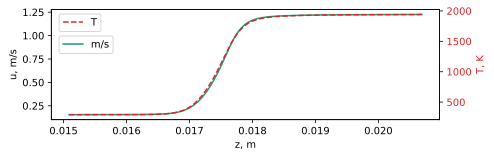

In [23]:
plt.style.use('default')

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7, 2))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('u, m/s', color=color) 

ax2.plot(f.grid[mask], f.velocity[mask], label="m/s")
ax2.legend(loc=(0.02, 0.6))
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)


In [26]:
import h5py

/home/vasily/miniforge3/envs/empirica_traveling_flame/lib/python3.13/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.4 when it was built against 1.14.3, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


/tmp/ipykernel_1641619/3856387825.py:18: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3856387825.py:18: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3856387825.py:18: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3856387825.py:18: UserWarning: NasaPoly2::validate: 
For 

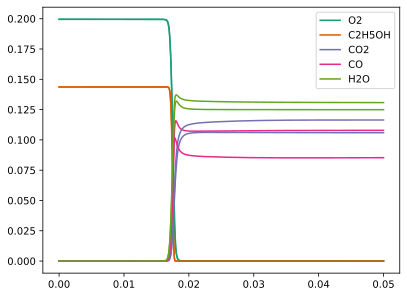

In [71]:

spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
cs = plt.cm.Dark2(list(range(len(spns))))

with h5py.File("flames/ethanol-marinov.yaml.9.res.hdf", "r") as f:
    file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
    gas = ct.Solution(file)
    
    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))
    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))
    # print(f["solution"]["flame"]["Y"][gas.specie_index()])

    for j, i in enumerate(spns):
        i_ = str(i).upper()
        plt.plot(np.array(f["solution"]["flame"]["grid"]),  np.array(f["solution"]["flame"]["Y"])[:, gas.species_index(i)], label=i_, c=cs[j])

with h5py.File("flames/ethanol66.yaml.9.res.hdf", "r") as f:
    file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
    gas = ct.Solution(file)

    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))

    for j, i in enumerate(spns):
        i = str(i).upper()
        plt.plot(np.array(f["solution"]["flame"]["grid"]),  np.array(f["solution"]["flame"]["Y"])[:, gas.species_index(i)], c=cs[j])

plt.legend()

/tmp/ipykernel_1641619/3116620242.py:20: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3116620242.py:20: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3116620242.py:20: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(file)
/tmp/ipykernel_1641619/3116620242.py:20: UserWarning: NasaPoly2::validate: 
For 

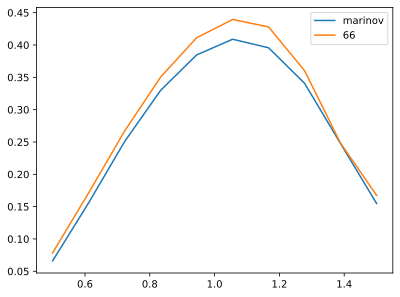

In [85]:

# spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
# cs = plt.cm.Dark2(list(range(len(spns))))
vels = []
ys = []

file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
gas = ct.Solution(file)
for i in range(10):
    with h5py.File(f"flames/ethanol-marinov.yaml.{i}.res.hdf", "r") as f:
        file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
        vels.append(f["solution"]["flame"]["velocity"][0])
        ys.append(f["solution"]["flame"]["Y"][0][gas.species_index(i)])

plt.plot(phi_list, vels, label="marinov")

vels = []
ys = []

file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
gas = ct.Solution(file)
for i in range(10):
    with h5py.File(f"flames/ethanol66.yaml.{i}.res.hdf", "r") as f:
        file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
        vels.append(f["solution"]["flame"]["velocity"][0])
        ys.append(f["solution"]["flame"]["Y"][0][gas.species_index(i)])

plt.plot(phi_list, vels, label="66")

plt.legend()

In [ ]:

with h5py.File("ethanol-marinov.yaml.res.hdf", "r") as f:
    plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))


with h5py.File("ethanol66.yaml.res.hdf", "r") as f:
    plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))

In [79]:
f =  h5py.File("ethanol66.yaml.res.hdf", "r")

In [59]:
f["solution"]["flame"]["Y"][""]

<HDF5 dataset "Y": shape (219, 34), type "<f8">

In [81]:
f["solution"]["flame"]["velocity"][0]

np.float64(0.1674059939504277)

In [76]:
f["solution"]["flame"].keys()

<KeysViewHDF5 ['D', 'T', 'Y', 'fixed-point', 'grid', 'phase', 'refine-criteria', 'tolerances', 'velocity']>

In [83]:
ys

[np.float64(0.7263878817539252),
 np.float64(-2.0827420616298623e-59),
 np.float64(1.351826302554079e-61),
 np.float64(3.3359273869902614e-16),
 np.float64(0.21074352871183621),
 np.float64(1.2586055828837072e-15),
 np.float64(1.3440925350908946e-16),
 np.float64(-1.2125074963976644e-15),
 np.float64(-1.4977232382928526e-15),
 np.float64(-1.0152529644736755e-15)]